<h1 style="font-size:44px;"> <span style="color:#4B8BBE;">TextBlob</span> for Python Developer </h1>

In [37]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()


In [38]:
txts = ['I love Machine learning', 
        'I do not like machine learning', 
         'I hate machine learning', 
        'Life is great', 
        'Thank you so much for everyhting',
        'Such an interesting course'
       ]

In [39]:
df = pd.DataFrame(txts, columns=['text'])

In [40]:
df

,text
0,I love Machine learning
1,I do not like machine learning
2,I hate machine learning
3,Life is great
4,Thank you so much for everyhting
5,Such an interesting course


In [50]:
blob = TextBlob('I so happy')
print(blob.sentences[0].sentiment.polarity) # -1 to 1

0.8


In [42]:
def find_polarity(txt):
    blob = TextBlob(txt)
    return blob.sentences[0].sentiment.polarity

df['polarity'] = df['text'].apply(find_polarity)
df

,text,polarity
0,I love Machine learning,0.50
1,I do not like machine learning,0.00
2,I hate machine learning,-0.80
3,Life is great,0.80
4,Thank you so much for everyhting,0.20
5,Such an interesting course,0.25


In [43]:
def find_sentiment(txt):
        if find_polarity(txt) > 0:
            return 'Postitive'
        elif find_polarity(txt) == 0:
                return 'Neutral'
        elif find_polarity(txt) < 0:
            return 'Negative'
        else:
            pass


In [44]:
df['sentiments'] = df['text'].apply(find_sentiment)

In [45]:
df

,text,polarity,sentiments
0,I love Machine learning,0.50,Postitive
1,I do not like machine learning,0.00,Neutral
2,I hate machine learning,-0.80,Negative
3,Life is great,0.80,Postitive
4,Thank you so much for everyhting,0.20,Postitive
5,Such an interesting course,0.25,Postitive


In [46]:

values = df['sentiments'].value_counts().values
indexes = df['sentiments'].value_counts().index

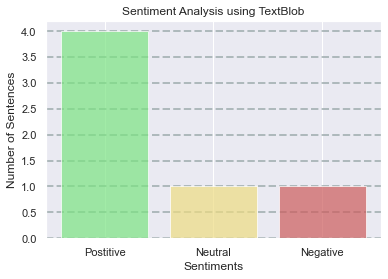

In [47]:
plt.title('Sentiment Analysis using TextBlob')
plt.xlabel('Sentiments')
plt.ylabel('Number of Sentences')
# plt.legend(indexes)
plt.bar(indexes, values,color=['#7be382','#eedc82', '#cd5c5c'], alpha = 0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.show()